In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import dataset

In [165]:
data = pd.read_csv('2020_al.csv')

In [166]:
data.shape

(337553, 19)

In [167]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [169]:
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

In [170]:
data['gender'].fillna('Unknown', inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_47152\2185318324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Unknown', inplace=True)


In [171]:
data.isnull().sum()

index            0
stream           0
Zscore           0
district_rank    0
island_rank      0
al_year          0
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
cgt_r            0
ge_r             0
syllabus         0
birth_day        0
birth_month      0
birth_year       0
gender           0
dtype: int64

In [172]:
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

In [173]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [174]:
data= data.drop(columns=['index', 'al_year', 'birth_day', 'birth_month', 'birth_year','island_rank', 'district_rank', 'cgt_r', 'ge_r' ])

In [175]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,ARTS,-.3550,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,new,female
1,ARTS,-.2648,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,new,female
2,COMMERCE,-.4760,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,new,female
3,COMMERCE,-.1012,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,new,female
4,COMMERCE,.6014,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,new,female


In [176]:
data.shape

(337553, 10)

In [177]:
cols = ['stream', 'sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'syllabus', 'gender']

label_encoders = {col: LabelEncoder() for col in cols}

for col in cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [178]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-.3550,47,5,20,3,58,6,0,2
1,1,-.2648,47,5,12,3,58,4,0,2
2,4,-.4760,21,5,11,5,0,6,0,2
3,4,-.1012,21,3,11,3,0,6,0,2
4,4,.6014,21,3,11,3,0,3,0,2


In [179]:
data["Zscore"] = pd.to_numeric(data['Zscore'], errors='coerce') #coerce will introduce null values for non numeric data in the columns

In [180]:
data.isnull().sum()

stream           0
Zscore      105249
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
syllabus         0
gender           0
dtype: int64

# Anslysis

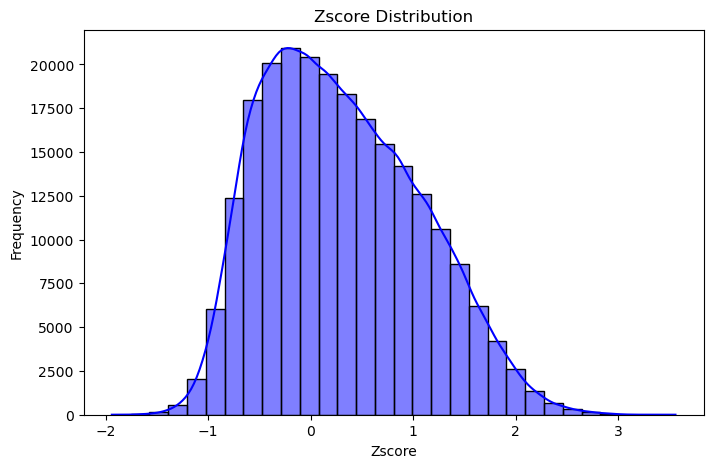

In [181]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Zscore'], kde=True, bins=30, color='blue')
plt.title('Zscore Distribution')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.show()

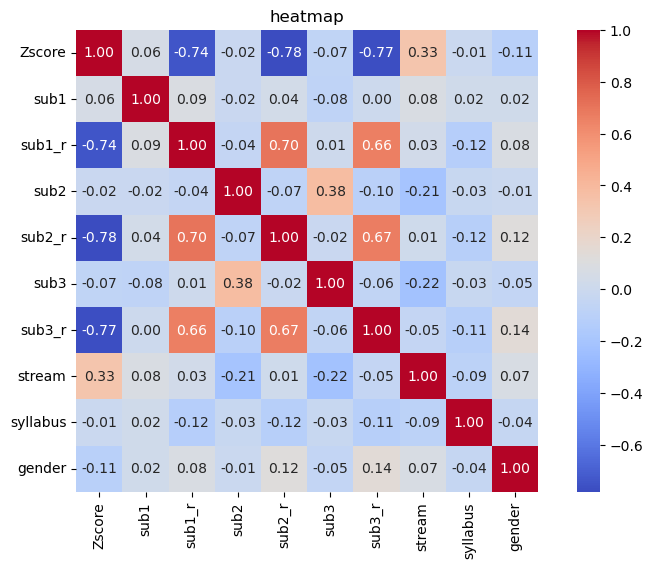

In [182]:
plt.figure(figsize=(10, 6))
m_data = data[['Zscore','sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'stream','syllabus', 'gender']]
sns.heatmap(m_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('heatmap')
plt.show()

C:\Users\Ishan\AppData\Local\Temp\ipykernel_47152\2205922180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '7'),
  Text(5, 0, '5'),
  Text(6, 0, '3'),
  Text(7, 0, '6')])

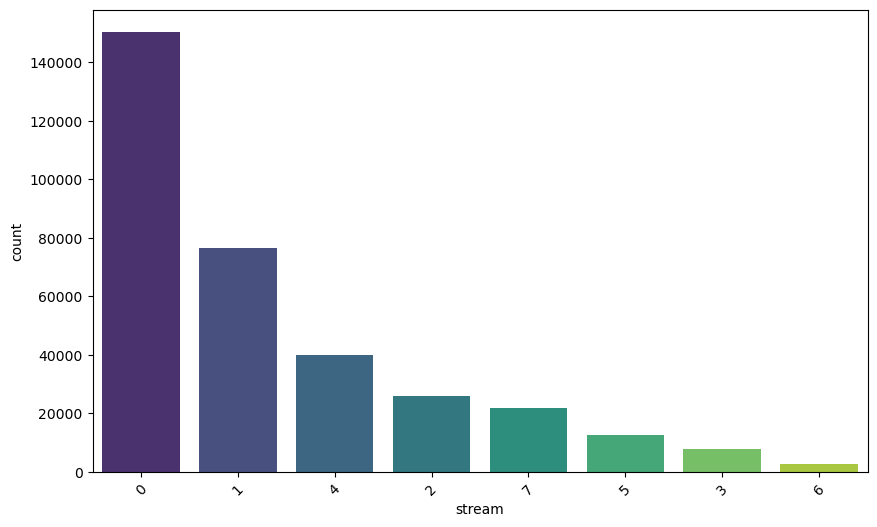

In [183]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)
plt.xticks(rotation=45)

In [184]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int32  
 1   Zscore    232304 non-null  float64
 2   sub1      337553 non-null  int32  
 3   sub1_r    337553 non-null  int32  
 4   sub2      337553 non-null  int32  
 5   sub2_r    337553 non-null  int32  
 6   sub3      337553 non-null  int32  
 7   sub3_r    337553 non-null  int32  
 8   syllabus  337553 non-null  int32  
 9   gender    337553 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 14.2 MB


In [186]:
data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_47152\1708949586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)


In [187]:
x = data.drop(columns=['Zscore'])
y = data['Zscore']

In [188]:
x.head()

,stream,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,47,5,20,3,58,6,0,2
1,1,47,5,12,3,58,4,0,2
2,4,21,5,11,5,0,6,0,2
3,4,21,3,11,3,0,6,0,2
4,4,21,3,11,3,0,3,0,2


In [189]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   stream    337553 non-null  int32
 1   sub1      337553 non-null  int32
 2   sub1_r    337553 non-null  int32
 3   sub2      337553 non-null  int32
 4   sub2_r    337553 non-null  int32
 5   sub3      337553 non-null  int32
 6   sub3_r    337553 non-null  int32
 7   syllabus  337553 non-null  int32
 8   gender    337553 non-null  int32
dtypes: int32(9)
memory usage: 11.6 MB


In [190]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 337553 entries, 0 to 337552
Series name: Zscore
Non-Null Count   Dtype  
--------------   -----  
337553 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [192]:
x.shape, y.shape

((337553, 9), (337553,))

In [193]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((236287, 9), (236287,), (101266, 9), (101266,))

In [194]:
model = LinearRegression()

In [195]:
model.fit(x_train, y_train)

LinearRegression()

In [196]:
acc1 = model.score(x_train, y_train)
acc2 = model.score(x_test, y_test)
print(f"Training Accuracy: {acc1:.2f}")
print(f"Testing Accuracy: {acc2:.2f}")

Training Accuracy: 0.60
Testing Accuracy: 0.61


In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler = StandardScaler()

In [199]:
x_train_scaled = scaler.fit_transform(x_train) #fit_transform is used to scale the training data
x_test_scaled = scaler.transform(x_test) #transform is used to scale the testing data

In [200]:
yhat = model.predict(x_test_scaled)
yhat

c:\Users\Ishan\anaconda3\envs\mls\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.04316496, 1.66106449, 1.0129492 , ..., 1.99334239, 1.28858704,
       1.1062999 ])

In [201]:
r2_score(y_test, yhat)

-1.919730997856333

In [202]:
model2 = LinearRegression()

In [203]:
model2.fit(x_train_scaled, y_train)

LinearRegression()

In [204]:
acc3 = model2.score(x_train_scaled, y_train)
acc4 = model2.score(x_test_scaled, y_test)

print(f"Training Accuracy: {acc3:.2f}")
print(f"Testing Accuracy: {acc4:.2f}")

Training Accuracy: 0.60
Testing Accuracy: 0.61


In [205]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [206]:
poly_x_train = poly_features.fit_transform(x_train_scaled)

In [207]:
model = LinearRegression()
model.fit(poly_x_train, y_train)

LinearRegression()

In [208]:
poly_x_test = poly_features.fit_transform(x_test_scaled)

In [209]:
acc0 = model.score(poly_x_train, y_train)
acc9 = model.score(poly_x_test, y_test)

print(f"Training Accuracy: {acc0:.2f}")
print(f"Testing Accuracy: {acc9:.2f}")

Training Accuracy: 0.74
Testing Accuracy: 0.74


In [210]:
import pickle 
# Save the trained model as a pickle string.
with open('model.pkl', 'wb') as model_pkl:
    pickle.dump(model, model_pkl)

In [211]:
with open('scaler.pkl', 'wb') as scaler_pkl:
    pickle.dump(scaler, scaler_pkl)

with open('poly_features.pkl', 'wb') as poly_pkl:
    pickle.dump(poly_features, poly_pkl)

In [212]:
{label: code for label, code in zip(label_encoders['sub1'].classes_, range(len(label_encoders['sub1'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ART': 3,
 'BIO SYSTEMS TECHNOLOGY': 4,
 'BIO-RESOURCE TECHNOLOGY': 5,
 'BIOLOGY': 6,
 'BUDDHISM': 7,
 'BUDDHIST CIVILIZATION': 8,
 'BUSINESS STATISTICS': 9,
 'BUSINESS STUDIES': 10,
 'CARNATIC MUSIC': 11,
 'CHEMISTRY': 12,
 'CHRISTIAN CIVILIZATION': 13,
 'CHRISTIANITY': 14,
 'CIVIL TECHNOLOGY': 15,
 'COMBINED MATHEMATICS': 16,
 'COMMUNICATION & MEDIA STUDIES': 17,
 'DANCING(BHARATHA)': 18,
 'DANCING(INDIGENOUS)': 19,
 'DRAMA AND THEATRE (SINHALA)': 20,
 'ECONOMICS': 21,
 'ELECTRICAL,ELECTRONIC AND IT': 22,
 'ENGINEERING TECHNOLOGY': 23,
 'ENGLISH': 24,
 'FOOD TECHNOLOGY': 25,
 'GEOGRAPHY': 26,
 'GREEK & ROMAN CIVILIZATION': 27,
 'HIGHER MATHEMATICS': 28,
 'HINDU CIVILIZATION': 29,
 'HINDUISM': 30,
 'HISTORY OF EUROPE': 31,
 'HISTORY OF INDIA': 32,
 'HISTORY OF MODERN WORLD': 33,
 'HISTORY OF SRI LANKA & EUROPE': 34,
 'HISTORY OF SRI LANKA & INDIA': 35,
 'HISTORY OF SRI LANKA & MODERN WORLD': 36,
 'HOME ECONOMICS': 3

In [213]:
x.head(
)

,stream,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,47,5,20,3,58,6,0,2
1,1,47,5,12,3,58,4,0,2
2,4,21,5,11,5,0,6,0,2
3,4,21,3,11,3,0,6,0,2
4,4,21,3,11,3,0,3,0,2


In [214]:
{label: code for label, code in zip(label_encoders['stream'].classes_, range(len(label_encoders['stream'].classes_)))}

{'-': 0,
 'ARTS': 1,
 'BIOLOGICAL SCIENCE': 2,
 'BIOSYSTEMS TECHNOLOGY': 3,
 'COMMERCE': 4,
 'ENGINEERING TECHNOLOGY': 5,
 'NON': 6,
 'PHYSICAL SCIENCE': 7}

In [215]:
{label: code for label, code in zip(label_encoders['syllabus'].classes_, range(len(label_encoders['syllabus'].classes_)))}

{'new': 0, 'old': 1}

In [216]:
{label: code for label, code in zip(label_encoders['gender'].classes_, range(len(label_encoders['gender'].classes_)))}

{'Major error': 0, 'Unknown': 1, 'female': 2, 'male': 3}

In [217]:
{label: code for label, code in zip(label_encoders['sub1_r'].classes_, range(len(label_encoders['sub1_r'].classes_)))}

{'A': 0, 'Absent': 1, 'B': 2, 'C': 3, 'F': 4, 'S': 5, 'Withheld': 6}

In [218]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2
